In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/AndyBC27/parkinsons-disease-data/main/parkinsons_disease_data.csv'
df = pd.read_csv(url)

#extract important data for us
relevant_columns = ['Age', 'Gender', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'TraumaticBrainInjury', 'Diagnosis']
df = df[relevant_columns]
df.head()

,Age,Gender,Hypertension,Diabetes,Depression,Stroke,TraumaticBrainInjury,Diagnosis
0,85,0,0,0,0,0,0,0
1,75,0,0,0,0,0,0,1
2,70,1,0,1,0,0,0,1
3,52,0,0,0,0,0,0,1
4,87,0,0,0,0,0,0,0


In [3]:
#check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Age                     0
Gender                  0
Hypertension            0
Diabetes                0
Depression              0
Stroke                  0
TraumaticBrainInjury    0
Diagnosis               0
dtype: int64


There is no missig data in the columns important for us.

In [4]:
df.describe()

,Age,Gender,Hypertension,Diabetes,Depression,Stroke,TraumaticBrainInjury,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,0.145843,0.148219,0.205226,0.048931,0.106413,0.619477
std,11.594511,0.500065,0.353033,0.355401,0.403962,0.215775,0.308439,0.485631
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Summary statistics show that the Age and Gender distribution is fairly even, and comorbid conditions aren't evenly distributed.

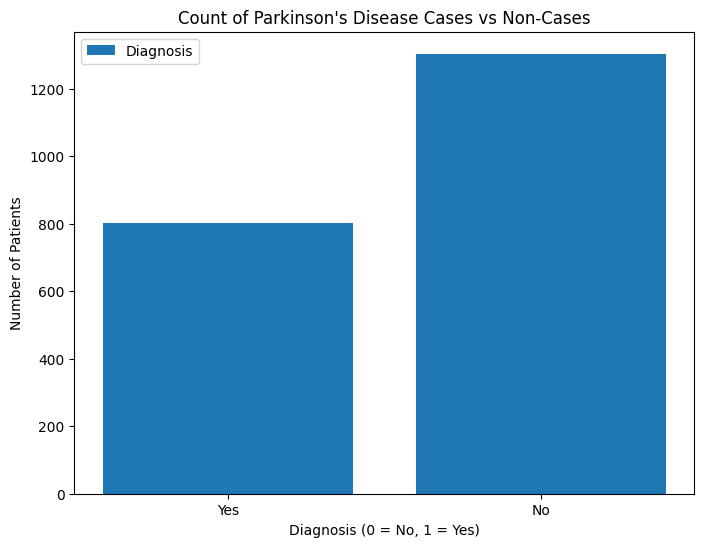

In [5]:
parkinsons_count = df['Diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(parkinsons_count.index, parkinsons_count.values, tick_label=['No', 'Yes'])
plt.legend(['Diagnosis'])
plt.title("Count of Parkinson's Disease Cases vs Non-Cases")
plt.xlabel("Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()


In [12]:
parkinsons_count.values


array([1304,  801])

In [6]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


In [7]:
df['Diagnosis'].value_counts(normalize=True)

,proportion
Diagnosis,
1,0.619477
0,0.380523


We can see that 61% of the patients have Parkinsons and 39% don't. This means that the dataset contains a substantial representation of both Parkinson's positive and negative cases, which is important for developing a good model.


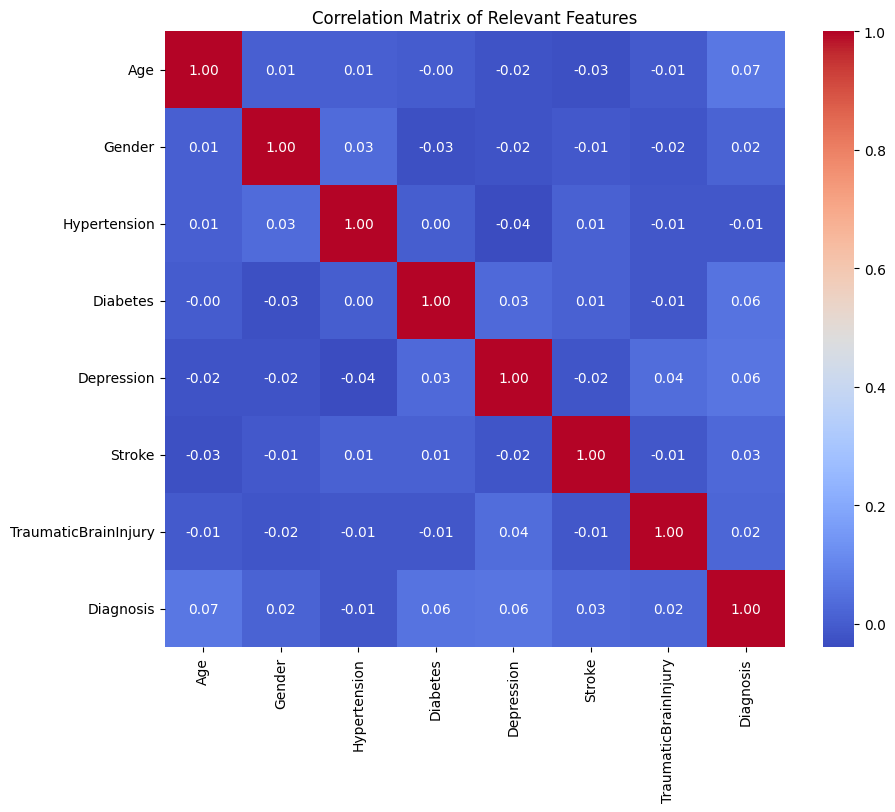

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Relevant Features")
plt.show()

Correlation values between features are low, indicating that they are relatively independent of each other.

In [9]:
correlation_matrix['Diagnosis'].sort_values(ascending=False)

,Diagnosis
Diagnosis,1.000000
Age,0.065344
Depression,0.059080
Diabetes,0.057067
Stroke,0.028093
TraumaticBrainInjury,0.022964
Gender,0.016835
Hypertension,-0.011587


None of the features have a strong correlation with the Diagnosis, suggesting no single feature strongly predicts Parkinson's. This could lead to poor clustering results, as the model may struggle to form meaningful groups.

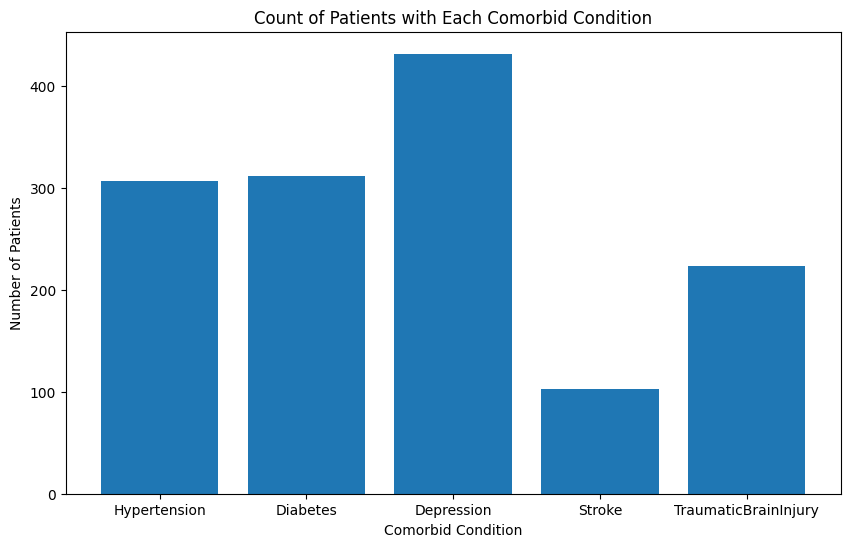

In [10]:
comorbid_conditions = ['Hypertension', 'Diabetes', 'Depression', 'Stroke', 'TraumaticBrainInjury']

condition_counts = df[comorbid_conditions].sum()

plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index, condition_counts.values)
plt.title("Count of Patients with Each Comorbid Condition")
plt.xlabel("Comorbid Condition")
plt.ylabel("Number of Patients")
plt.show()

The comorbid conditions are roughly evenly represented, with Stroke being slightly less common and Depression more common than the others.


In [11]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>